# Flight delay prediction
#Dataset link: http://stat-computing.org/dataexpo/2009/the-data.html
#Years considered: 2007,2008
#The data was originally fetched from RITA(https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
#Reading data for 2007
df_2007 = pd.read_csv("2007.csv")

In [5]:
#Reading data for 2008
df_2008 = pd.read_csv("2008.csv")

# Data sneak peak

In [6]:
df_2007.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [7]:
df_2008.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [9]:
#check for number of columns and rows
df_2007.shape

(7453215, 29)

In [10]:
#check for number of columns and rows
df_2008.shape

(7009728, 29)

Creating a categorical Y variable from the 'DepDelay' column to classify the delay in flights departure
If the delay is greater than 15 mins than it is classified as 'Delayed' else 'NotDelayed'

In [26]:
delay = []
df_delay = np.array(df_2007['DepDelay'])

for i in df_delay:
    if i>= 15:
        delay.append('Delayed')
    else:
        delay.append('NotDelayed')

In [16]:
delay

['NotDelayed',
 'NotDelayed',
 'Delayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'Delayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'Delayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'NotDelayed',
 'Delayed',
 'No

# Vizualization of the data

In [27]:
np_delay = np.array(delay)

(array([ 1572335.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,  5880880.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

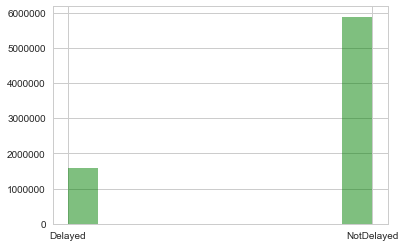

In [31]:
plt.hist(np_delay, bins=10, alpha=0.5, color = 'Green')

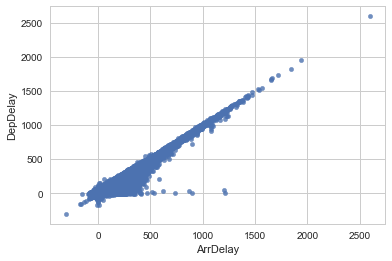

In [33]:
df_2007.plot(kind='scatter',x='ArrDelay',y='DepDelay',alpha=0.8)

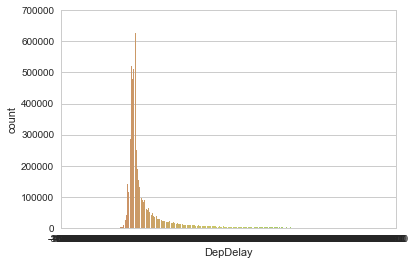

In [46]:
sns.countplot(x='DepDelay',data=df_2007, palette='hls')
plt.axis([0,400,0,700000])
plt.show()

# Slicing and Dicing of the data

1. Choosing only few columns that I felt were of utmost importance.
2. Since the data is very huge, I would limit my analysis to only 1 airport = 'LAX' - as it is one of the most busiest airport in USA.
3. Not considering the data where flights have been cancelled, as the delay is 0 in such case
4. Dropping all the NA as the part of data cleaning

In [34]:
LAX_2007 = df_2007[(df_2007['Origin'] == 'LAX') & (df_2007['Cancelled'] == 0)].dropna(subset=['DepDelay','Month','DayofMonth','DayOfWeek', 'Distance','ArrDelay'])

In [35]:
LAX_2008 = df_2008[(df_2008['Origin'] == 'LAX') & (df_2008['Cancelled'] == 0)].dropna(subset=['DepDelay','Month','DayofMonth','DayOfWeek', 'Distance','ArrDelay'])

In [49]:
#selecting only necessary columnsdelay
feature_cols =['Month','DayofMonth','DayOfWeek', 'Distance','ArrDelay']

Creating a categorical Y variable from the 'DepDelay' column to classify the delay in flights departure
If the delay is greater than 15 mins than it is classified as 'Delayed' else 'NotDelayed'

In [72]:
df_delay_2007 = []
dfn = np.array(LAX_2007['DepDelay'])

for i in dfn:
    if i>= 15:
        df_delay_2007.append('Delayed')
    else:
        df_delay_2007.append('NotDelayed')

# Training and test data split with stratified sampling

In [73]:
train_x = LAX_2007[feature_cols]

In [74]:
train_y = df_delay_2007

In [53]:
from sklearn.model_selection import train_test_split

In [75]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(train_x, train_y, test_size=0.3, random_state=42, stratify=train_y)

## Model 1: Predicting 2007 flight delays using Linear Logistic Regression

In [76]:
from sklearn import linear_model

In [77]:
Model1 = linear_model.LogisticRegression(penalty='l2', class_weight='balanced')

In [79]:
Model1.fit(train_x1, train_y1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [80]:
pred1 = Model1.predict(test_x1)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [98]:
cm1 = confusion_matrix(test_y1, pred1)

In [99]:
print(pd.DataFrame(cm1))

       0      1
0  11281   1819
1   5496  51586


In [89]:
print(classification_report(test_y1,pred1))

             precision    recall  f1-score   support

    Delayed       0.67      0.86      0.76     13100
 NotDelayed       0.97      0.90      0.93     57082

avg / total       0.91      0.90      0.90     70182



# Model2: Predicting 2008 flight delays using 2007 data

In [91]:
train_x = LAX_2007[feature_cols]

In [92]:
train_y1 = LAX_2007['DepDelay']>= 15

In [93]:
test_x = LAX_2008[feature_cols]

In [94]:
test_y = LAX_2008['DepDelay']>= 15

In [95]:
Model2 = linear_model.LogisticRegression(penalty='l2', class_weight='balanced')

In [96]:
Model2.fit(train_x, train_y1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [97]:
pred2 = Model2.predict(test_x)

In [101]:
cm2 = confusion_matrix(test_y, pred2)

In [102]:
print(pd.DataFrame(cm2))

        0      1
0  162404  11734
1    6698  31458


In [103]:
print(classification_report(test_y,pred2))

             precision    recall  f1-score   support

      False       0.96      0.93      0.95    174138
       True       0.73      0.82      0.77     38156

avg / total       0.92      0.91      0.92    212294

